In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int)

In [3]:
per_clf = Perceptron()
per_clf.fit(X,y)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [4]:
y_pred = per_clf.predict([[2,.5]])

In [5]:
y_pred

array([1])

In [1]:
import tensorflow as tf
from tensorflow import keras

In [40]:
tf.__version__

'2.0.0-beta0'

In [41]:
keras.__version__

'2.2.4-tf'

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [9]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dense(300, activation='relu'),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(10, activation='softmax'),
])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
keras.utils.plot_model(model)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [14]:
model.layers

In [15]:
model.layers[0].name

'flatten_1'

In [16]:
model.get_layer('flatten_1').name

'flatten_1'

In [17]:
 weights, biases =model.layers[1].get_weights()

In [18]:
weights.shape

(784, 300)

In [19]:
biases.shape

(300,)

In [20]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [21]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer='sgd',metrics=['accuracy'])

In [22]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

W0617 10:55:05.840784  6516 deprecation.py:323] From D:\Program Files\Anaconda\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.7103 - accuracy: 0.7701 - val_loss: 0.5141 - val_accuracy: 0.8236
Epoch 2/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.4875 - accuracy: 0.8292 - val_loss: 0.4338 - val_accuracy: 0.8544
Epoch 3/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.4438 - accuracy: 0.8439 - val_loss: 0.4272 - val_accuracy: 0.8542
Epoch 4/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.4168 - accuracy: 0.8540 - val_loss: 0.3904 - val_accuracy: 0.8684
Epoch 5/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.3971 - accuracy: 0.8609 - val_loss: 0.3912 - val_accuracy: 0.8642
Epoch

(0, 1)

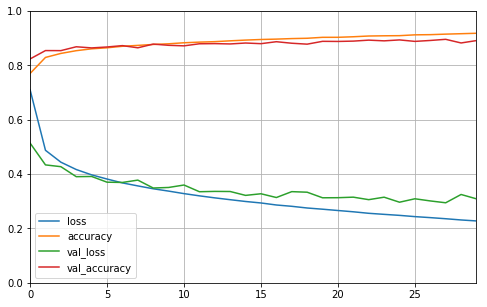

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [25]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 2.6910 - accuracy: 0.8300


[2.6910091178894042, 0.83]

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
y_pred = model.predict_classes(X_new)
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [34]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

# Building a Regression MLP Using the Sequential API-- California housing

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
housing = fetch_california_housing()

I0617 11:22:16.863525  6516 california_housing.py:114] Downloading Cal. housing from https://ndownloader.figshare.com/files/5976036 to C:\Users\Administrator\scikit_learn_data


In [37]:
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [62]:
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
model = keras.models.Sequential([
  keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
  keras.layers.Dense(1)
])  

In [63]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(lr=1e-3))

In [68]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 56us/sample - loss: 1.9073 - val_loss: 0.7592
Epoch 2/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.6730 - val_loss: 0.6150
Epoch 3/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.6074 - val_loss: 0.5782
Epoch 4/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5805 - val_loss: 0.5541
Epoch 5/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5609 - val_loss: 0.5369
Epoch 6/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5452 - val_loss: 0.5221
Epoch 7/20
11610/11610 [===========================

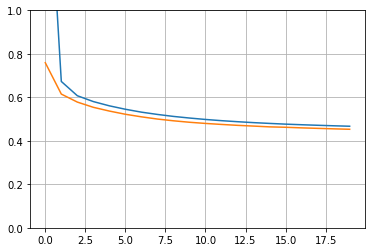

In [70]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
# plt.gca().set_ylim(0,1)
plt.ylim([0,1])
plt.show()

## with wide and deep branch

In [72]:
input_ =keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation='relu')(input_)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_],outputs=[output])

In [73]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 30)           930         dense_19[0][0]                   
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_2[0][0]                    
                                                                 dense_20[0][0]               

## with overlapping input

In [76]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30,activation='relu')(input_B)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A,input_B],outputs=[output])

In [78]:
model.compile(loss='mse',optimizer='sgd')

In [79]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
 validation_data=((X_valid_A, X_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 47us/sample - loss: nan - val_loss: nan
Epoch 2/20
11610/11610 [==============================] - 1s 49us/sample - loss: nan - val_loss: nan
Epoch 3/20
11610/11610 [==============================] - 1s 94us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 1s 116us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 2s 137us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 2s 133us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 1s 58us/sam